In [1]:
import matplotlib.pyplot as Plt
%matplotlib inline

In [2]:
from src.calibration import Calibration
from src.visualizer import Visualizer
calibrator = Calibration(images_path='../camera_cal/calibration*.jpg', board_shape=(9,6))
calibrator.calibrate_images()

{'camera_matrix': array([[1.15777818e+03, 0.00000000e+00, 6.67113856e+02],
        [0.00000000e+00, 1.15282217e+03, 3.86124584e+02],
        [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]]),
 'distortion_coefficient': array([[-0.24688507, -0.02373153, -0.00109831,  0.00035107, -0.00259872]])}

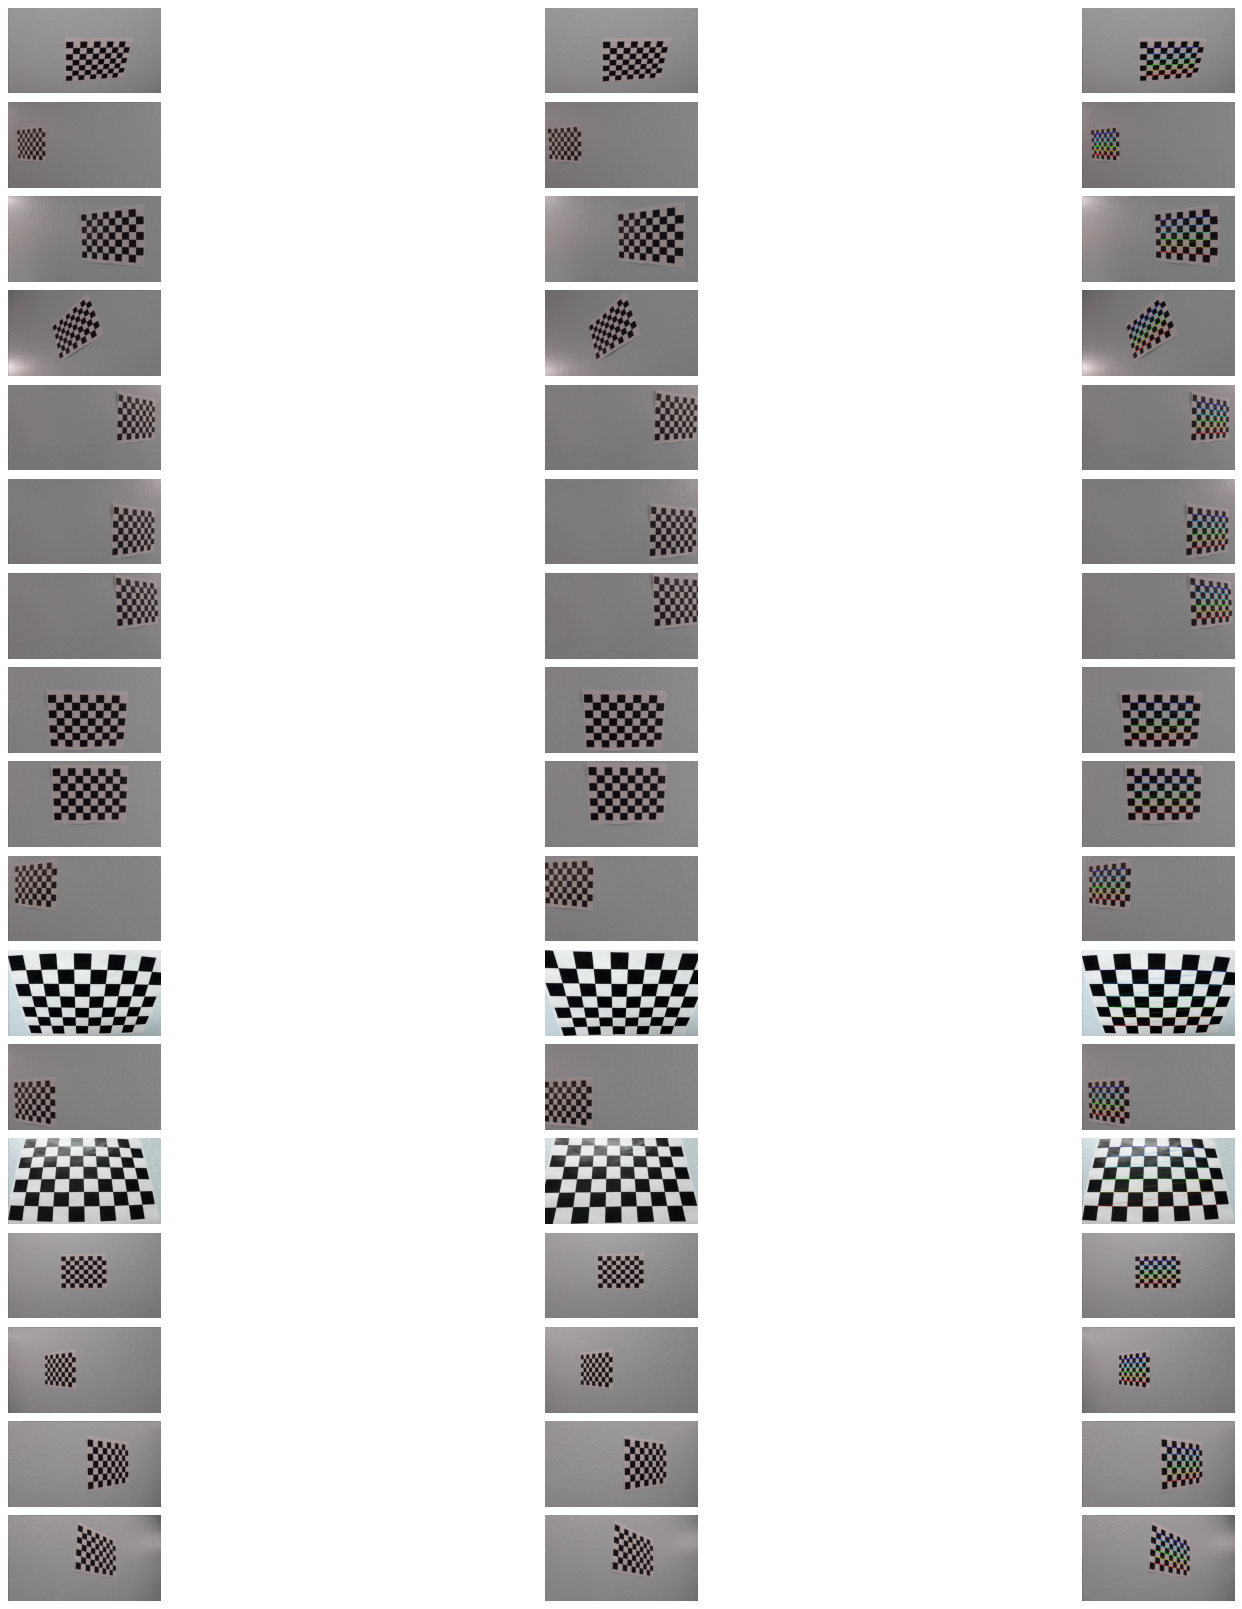

In [5]:
# Draw Raw image, corner image, undistorted image
import cv2
from src.camera import Camera
images_path = calibrator.read_calibration_images()
calibration_dict = calibrator.calibrate_images()
images = []
car_points = [(580, 460), (205, 720), (1110, 720), (703, 460)]
bird_points = [(320, 0), (320, 720), (960, 720), (960, 0)]
camera = Camera(calibration_dict, car_points, bird_points)

for image_path in images_path:
    image = cv2.imread(image_path)
    found, image_corners = calibrator.detect_corner(image)
    if found:
        undist = camera.get_undistort_image(image)
        corner_image = image.copy()
        cv2.drawChessboardCorners(corner_image, (9,6), image_corners, found)
        
        images.append(image)
        images.append(undist)
        images.append(corner_image)
        
visualizer = Visualizer()
visualizer.show_images(images, per_row=3, per_col = len(images)//3, W = 20, H = 20)
